In [48]:
from brian2 import*

c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\setuptools\distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "
INFO       Cache size for target "cython": 5726 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "C:\Users\Victoria\.cython\brian_extensions" directory. [brian2]


In [81]:
# remember, this is here for running separate simulations in the same notebook
start_scope()
# Parameters
num_inputs = 100
input_rate = 100*Hz
weight = 0.1
# Range of time constants
tau = 1*ms

# Construct the network each time
P = PoissonGroup(num_inputs, rates=input_rate)
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')
S = Synapses(P, G, on_pre='v_post += weight')
S.connect(condition= 'i==j')
M = SpikeMonitor(G)
N = StateMonitor(G, variables='v', record=0)
# Run it and store the output firing rate in the list
run(1*second)



WARNING    "i" is an internal variable of group "synapses_1", but also exists in the run namespace with the value 2. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


In [106]:
l = {"gro" : 3}

In [108]:
if "3" in l.keys():
    print("gro")

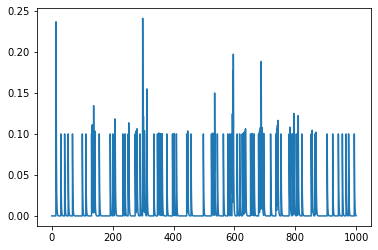

In [82]:
plot(N.t / ms, N.v[0])

WARNING    "v" is an internal variable of group "neurongroup", but also exists in the run namespace with the value array([4, 6]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "v" is an internal variable of group "synapses", but also exists in the run namespace with the value array([4, 6]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "v" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value array([4, 6]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "v" is an internal variable of group "synapses_1", but also exists in the run namespace with the value array([4, 6]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


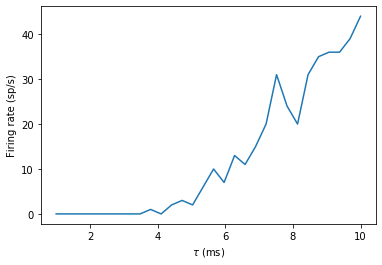

In [49]:
# remember, this is here for running separate simulations in the same notebook
start_scope()
# Parameters
num_inputs = 100
input_rate = 10*Hz
weight = 0.1
# Range of time constants
tau_range = 10*ms
# Use this list to store output rates
output_rates = []
# Iterate over range of time constants
for tau in tau_range:
    # Construct the network each time
    P = PoissonGroup(num_inputs, rates=input_rate)
    eqs = '''
    dv/dt = -v/tau : 1
    '''
    G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')
    S = Synapses(P, G, on_pre='v += weight')
    S.connect()
    M = SpikeMonitor(G)
    # Run it and store the output firing rate in the list
    run(1*second)
    output_rates.append(M.num_spikes/second)
# And plot it
plot(tau_range/ms, output_rates)
xlabel(r'$\tau$ (ms)')
ylabel('Firing rate (sp/s)');

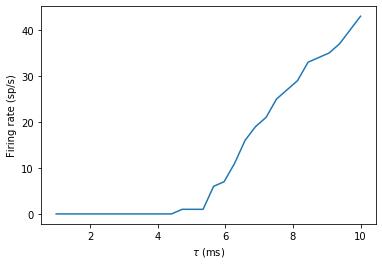

In [50]:
start_scope()
num_inputs = 100
input_rate = 10*Hz
weight = 0.1
tau_range = linspace(1, 10, 30)*ms
output_rates = []
# Construct the Poisson spikes just once
P = PoissonGroup(num_inputs, rates=input_rate)
MP = SpikeMonitor(P)
# We use a Network object because later on we don't
# want to include these objects
net = Network(P, MP)
net.run(1*second)
# And keep a copy of those spikes
spikes_i = MP.i
spikes_t = MP.t
# Now construct the network that we run each time
# SpikeGeneratorGroup gets the spikes that we created before
SGG = SpikeGeneratorGroup(num_inputs, spikes_i, spikes_t)
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')
S = Synapses(SGG, G, on_pre='v += weight')
S.connect()
M = SpikeMonitor(G)
# Store the current state of the network
net = Network(SGG, G, S, M)
net.store()
for tau in tau_range:
    # Restore the original state of the network
    net.restore()
    # Run it with the new value of tau
    net.run(1*second)
    output_rates.append(M.num_spikes/second)
plot(tau_range/ms, output_rates)
xlabel(r'$\tau$ (ms)')
ylabel('Firing rate (sp/s)');

WARNING    "tau" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 1. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


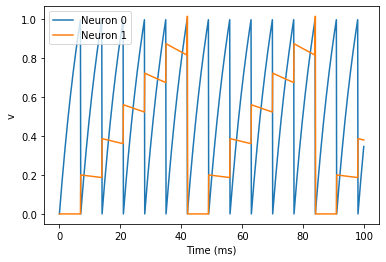

In [92]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0]
G.tau = [10, 100]*ms

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, on_pre='v_post += 0.2')
S.connect(i=0, j=1)

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend();

In [61]:
start_scope()
num_inputs = 100
input_rate = 10*Hz
weight = 0.1
tau_range = linspace(1, 10, 30)*ms
output_rates = []
# Construct the Poisson spikes just once
P = PoissonGroup(num_inputs, rates=input_rate)
MP = SpikeMonitor(P)
# We use a Network object because later on we don't
# want to include these objects
net = Network(P, MP)
net.run(1*second)
# And keep a copy of those spikes
spikes_i = MP.i
spikes_t = MP.t
# Now construct the network that we run each time
# SpikeGeneratorGroup gets the spikes that we created before
SGG = SpikeGeneratorGroup(num_inputs, spikes_i, spikes_t)
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')
S = Synapses(SGG, G, on_pre='v += weight')
S.connect()
M = SpikeMonitor(G)
N = StateMonitor(G, variables='v',record=0)
# Store the current state of the network
net = Network(SGG, G, S, M, N)
net.run(100*ms)

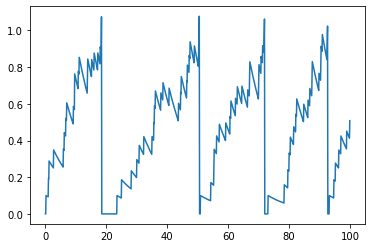

In [62]:
plot(N.t / ms, N.v[0])

In [56]:
start_scope()
num_inputs = 100
input_rate = 5*Hz
weight = 0.1
tau_range = linspace(1, 10, 30)*ms
output_rates = []
# Construct the Poisson spikes just once
P = PoissonGroup(num_inputs, rates=input_rate)
MP = SpikeMonitor(P)
# We use a Network object because later on we don't
# want to include these objects
net = Network(P, MP)
net.run(1*second)
# And keep a copy of those spikes
spikes_i = MP.i
spikes_t = MP.t

<spikemonitor_1.i: array([13, 99, 33, 59,  3, 22,  8, 23, 98, 43,  5, 45,  5, 59, 74,  9, 38,
       42, 74, 71, 70, 61, 46, 54, 37, 84, 99, 19, 87, 87, 46, 32, 47, 39,
       89, 97, 28,  1,  0, 82, 43, 75, 19, 57, 84, 30,  7, 70, 11, 64, 65,
       97, 96, 39, 26, 82, 97, 67, 81, 74, 95, 84, 22, 54, 13,  6,  2, 20,
       15, 55, 51,  3,  6, 26, 55, 98, 20, 40, 75, 65, 40, 41, 51, 66, 83,
       86, 80, 78, 79, 15, 88, 84, 48,  4, 70, 69, 24, 56, 31, 18, 26, 84,
       34, 93, 90, 85, 80, 36, 75, 22, 73, 35, 54, 97, 92, 35,  5, 12, 90,
       97,  5, 46, 96, 78, 28,  0, 48, 43,  5, 16, 76, 64, 29, 30, 82, 96,
       59, 16, 76, 86, 66, 15, 55, 67, 64, 70,  0,  4, 71, 47, 38, 89, 42,
       93,  4, 37,  7, 66, 32, 50, 52, 72, 50, 12, 76, 13, 40,  4, 60, 44,
       12, 49, 29,  3, 65, 91, 70, 24,  6, 24, 87, 76,  6, 36, 54, 86, 92,
       33, 30, 63,  8, 93, 50, 65, 74, 40, 27, 38, 61, 28, 96, 36, 25, 61,
        0, 74, 80, 45, 28, 54, 36, 28, 68, 32, 28, 34, 25, 93, 75, 19, 11,
      

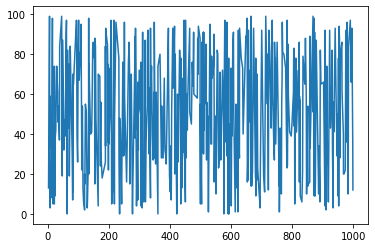

In [57]:
print(spikes_i)
print(spikes_t)
plot(spikes_t / msecond, spikes_i )

In [93]:
start_scope()
eqs_tonic = '''
dv/dt = ( - (v - v_leak_random)) / tau : 1
v_leak_random : 1
tau : second
'''

R = NeuronGroup(10, eqs_tonic, threshold='v>v_thr_random',
                     reset='v = v_reset_random',
                     refractory=50 * ms, method='euler')
R.v_leak_random = - 60
R.tau = 50 * ms
R.v = -80

In [94]:
MR = StateMonitor(R, 'v', record=True)
run(100 * ms)



WARNING    "tau" is an internal variable of group "neurongroup_3", but also exists in the run namespace with the value 1. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "v_leak_random" is an internal variable of group "neurongroup_3", but also exists in the run namespace with the value -60. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


BrianObjectException: Original error and traceback:
Traceback (most recent call last):
  File "c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\brian2\core\network.py", line 901, in before_run
    obj.before_run(run_namespace)
  File "c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\brian2\groups\group.py", line 1111, in before_run
    self.update_abstract_code(run_namespace=run_namespace)
  File "c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\brian2\groups\neurongroup.py", line 351, in update_abstract_code
    user_identifiers=identifiers)
  File "c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\brian2\groups\group.py", line 744, in resolve_all
    run_namespace=run_namespace)
  File "c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\brian2\groups\group.py", line 701, in _resolve
    return self._resolve_external(identifier, run_namespace=run_namespace)
  File "c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\brian2\groups\group.py", line 825, in _resolve_external
    raise KeyError(error_msg)
KeyError: 'The identifier "v_thr_random" could not be resolved.'

Error encountered with object named "neurongroup_3_thresholder".
Object was created here (most recent call only, full details in debug log):
  File "<ipython-input-93-1b152da2701e>", line 10, in <module>
    refractory=50 * ms, method='euler')

An error occurred when preparing an object. KeyError: 'The identifier "v_thr_random" could not be resolved.'
(See above for original error message and traceback.)

In [103]:
A = np.array([[0,2],[0,4]])

In [104]:
A.nonzero()

(array([0, 1], dtype=int64), array([1, 1], dtype=int64))

In [105]:
np.argwhere(A==0)

array([[0, 0],
       [1, 0]], dtype=int64)